### Imports

In [45]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import scale, StandardScaler

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

# Classification

If the target variables consists of categories we call the learning task `classification`. Alternatively, if the target is continuously varying variable it is a `regression` task.

`features` = `predictor variables` = `independent variables`

`target` = `dependent variable` = `response variable`

In [2]:
iris = datasets.load_iris()
print(iris.keys())
#type(iris)
type(iris.data), type(iris.target)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


(numpy.ndarray, numpy.ndarray)

### EDA - Exploratory data anylysis

In [3]:
# samples in rows, features in columns
print(iris.data.shape)
print(iris.target_names)

(150, 4)
['setosa' 'versicolor' 'virginica']


In [4]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


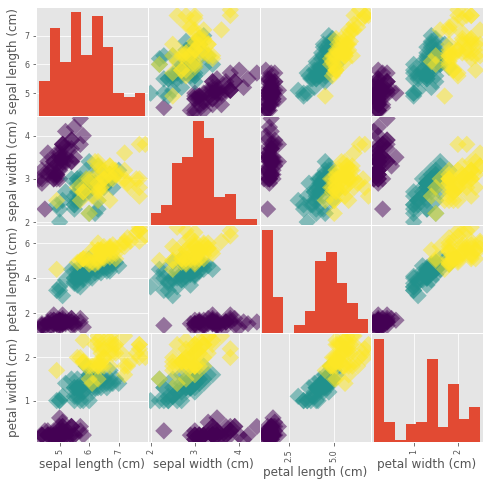

In [5]:
_ = pd.plotting.scatter_matrix(df, c = y, figsize = [8,8], s=150, marker='D') # s - thickness of marker

In [6]:
'''plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()'''

"plt.figure()\nsns.countplot(x='education', hue='party', data=df, palette='RdBu')\nplt.xticks([0,1], ['No', 'Yes'])\nplt.show()"

### k-Nearest Neighbors

KNN - predict the label of any data point by `looking at the 'k' closest labeled data points` and get them vote on what label the unlabeled point should have - `majority votes`

All ML models implemented as Python classes:
- they implement the algos for learning and prediciting
- store the info learned from data

Training a model on data, fitting - `.fit()` method <br>
To predict the labels of new data - `.predict()` method

In [7]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target'])
# no missing values, only continuous variables, np arrays and pd df's !

print(iris['data'].shape)
print(iris['target'].shape)

X_new = np.array([[5.6, 2.8, 3.9, 1.1],
                [5.7, 2.6, 3.8, 1.3],
                [4.7, 3.2, 1.3, 0.2]])

prediction = knn.predict(X_new)
print(X_new.shape)
print(prediction) # 1 for versicolor and 0 for setosa

(150, 4)
(150,)
(3, 4)
[1 1 0]


In [8]:
'''
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

y_pred = knn.predict(X)

new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))
'''

'\ny = df[\'party\'].values\nX = df.drop(\'party\', axis=1).values\n\n# Create a k-NN classifier with 6 neighbors\nknn = KNeighborsClassifier(n_neighbors=6)\n\n# Fit the classifier to the data\nknn.fit(X, y)\n\ny_pred = knn.predict(X)\n\nnew_prediction = knn.predict(X_new)\nprint("Prediction: {}".format(new_prediction))\n'

### Measure model performance

In [9]:
# randomly splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
# you want the labels to be distributed in train and test sets as they are in the original datasets
# to achieve this we use stratify (rozwastwiac)
# random_state - some kind of seed for random generator

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
# print(np.sum(y_test == y_pred)/np.size(y_pred))
print(knn.score(X_test, y_test))
print(knn.score(X_test, y_pred))

0.9555555555555556
1.0


<b>Overfitting</b> 
- larger k = smoother decision boundary = less complex model
- smaller k = more complex model = can lead to overfitting 

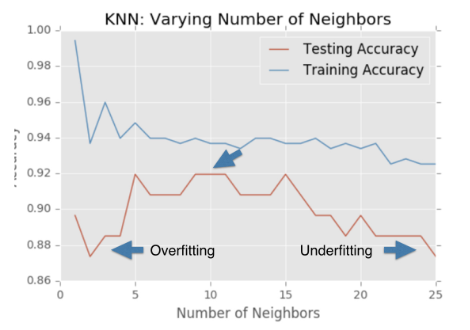

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 8, 8)
(1797, 64)


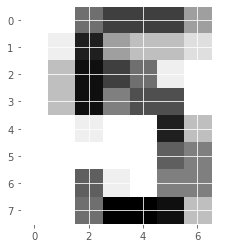

In [10]:
digits = datasets.load_digits()

print(digits.keys())
#print(digits['DESCR'])

print(digits.images.shape) # = digits.['images']
print(digits.data.shape)

plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [11]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

print(knn.score(X_test,y_test))
X

0.9833333333333333


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

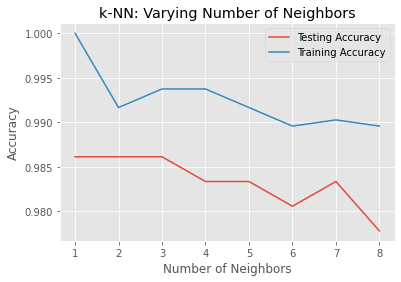

In [12]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# i - index, k - item
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Regression

In regression task the target value is continuously varying variable. 

(506,)
(506,)
(506, 1)


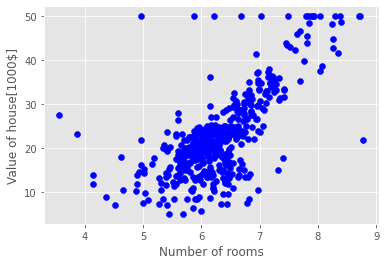

In [13]:
boston = pd.read_csv('boston.csv')
# print(boston.head())
# the target value is medv - median value of owner occupied homes in dollars (k's)
X = boston.drop('MEDV', axis=1).values # becomes np array
# axis = 0 -> drop rows, axis = 1 -> drop columns
y = boston.MEDV.values # values -> np array

# avg number of rooms in a block
X_rooms = X[:,5] # X_rooms = X.RM, only if X is pandas series, not np array (no .values while dropping 'MEDV')
print(X_rooms.shape)
print(y.shape)

# reshape to look like a column of samples (I quess)
y = y.reshape(-1,1) # if we have -1 -> this is not specified, exact the same as in our data - 506
print(y.shape)
X_rooms = X_rooms.reshape(-1,1)

plt.scatter(X_rooms, y, color='b')
plt.ylabel('Value of house[1000$]')
plt.xlabel('Number of rooms')
plt.show()

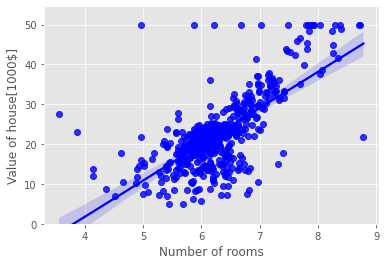

In [14]:
ax = sns.regplot(x=X_rooms,y=y,color='b')
ax.set(xlabel = 'Number of rooms', ylabel='Value of house[1000$]')
ax.set_ylim([0,max(y)+y.std()/2])
plt.show()

50


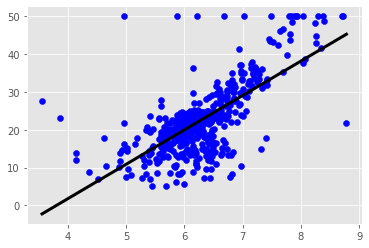

In [15]:
# Fitting a regression model to our data
reg = LinearRegression()
reg.fit(X_rooms, y)

prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)
print(len(prediction_space)) # it is default 50

plt.scatter(X_rooms, y, color='b')
plt.plot(prediction_space, reg.predict(prediction_space),
        color='black', linewidth=3)

plt.show()

   population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1   3.328945  24.59620  12314.0    129.9049  75.3   
1  19842251.0       6.43  2.0   1.474353  22.25083   7103.0    130.1247  58.3   
2  40381860.0       2.24  0.5   4.785170  27.50170  14646.0    118.8915  75.5   
3   2975029.0       1.40  0.1   1.804106  25.35542   7383.0    132.8108  72.5   
4  21370348.0       1.96  0.1  18.016313  27.56373  41312.0    117.3755  81.5   

   child_mortality                      Region  
0             29.5  Middle East & North Africa  
1            192.0          Sub-Saharan Africa  
2             15.4                     America  
3             20.0       Europe & Central Asia  
4              5.2         East Asia & Pacific  


69.60287769784172

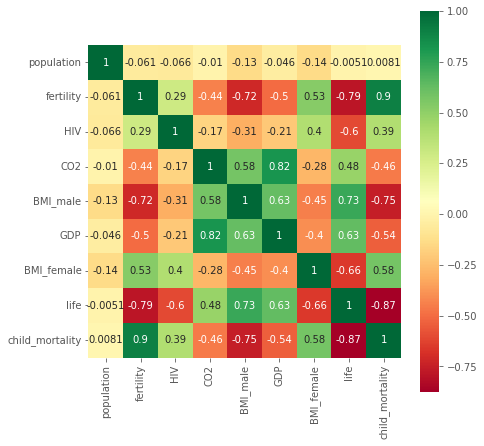

In [16]:
df = pd.read_csv('gapminder.csv')

X = df.fertility # urodzajność
y = df.life

y_reshaped = np.array(y).reshape(-1,1)
X_reshaped = np.array(X).reshape(-1,1)

plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), square=True, cmap='RdYlGn', annot=True)
print(df.head())

np.mean(df.life)

### Linear regression

- y = ax + b
    - y = target
    - x = single feature
    - a,b = parameters of model

Common idea is to define a loss/error/cost function and choose the line that minimize it. For each data point we will calculate the vertical distance between it and the line, it is called `residual`. We will sum up the squares - `OLS` ordinary least squares, similar to `MSE`. `OLS` is a method used during model fitting to minimise the sum of squares, and `MSE` is a metric used to evaluate the model after fitting the model, based on the average squared errors. We can of course use linear reg in higher dimensions. <br> <br>

The default scoring method for linear regression is called `R squared`.

In [17]:
X = (np.array(df.fertility)).reshape(-1,1) # urodzajność/płodność
y = (np.array(df.life)).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.7298987360907494

0.6192442167740035


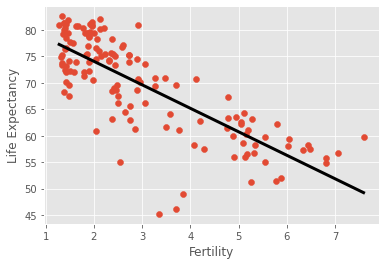

In [18]:
X_fertility = np.array(df.fertility).reshape(-1,1)
y = np.array(df.life).reshape(-1,1)
reg = LinearRegression()
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)
reg.fit(X_fertility, y)
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility,y))

plt.scatter(X_fertility,y)
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()
# sns.regplot(x=X_fertility,y=y) # faster

In [19]:
X = X_fertility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7298987360907494
Root Mean Squared Error: 4.194027914110243


### Cross-validation

`R squared` is dependent on way the data is splited and it migh be not representative to generalize. That's why we use `cross-validation`. <br>

We split data into 5 groups. First fold is our test data, and others are training data. Next the second fold is our test set, then third, fourth and eventually fifth. As a result we have 5 different splits and 5 values of R squared from which we can compute mean, median etc. It is called `k-fold CV` and in the particular example k=5. More folds are obviously more computionally expensive. <b>This method avoids the problem of your metric of choice being dependent on the train test split</b>.

In [20]:
X = (np.array(df.fertility)).reshape(-1,1) # urodzajność/płodność
y = (np.array(df.life)).reshape(-1,1)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)
print(cv_results)
np.mean(cv_results) # mean over all R'squared values

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]


0.6168819644425119

### Regularized regression

Linear regression minimizes a loss function, it chooses a coefficient for each feature variable. Large coefficients can lead to overfitting, that's why we will introduce `regularization` which is a process of penalizing large coefficients. <br>

Lasso using `L1` penalty. <br>
Ridge using `L2` penalty.

#### Ridge regression

Loss function is standard OLS (sum of squared distances) + squared value of each coefficient multiplied by some constant alpha. $$ OLS + \alpha \sum a_i^2$$ <br>
Picking alpha for ridge regression is similar to picking k in `KNN`. Alpha controls model complexity.
- $\alpha$ = 0: we get back OLS (can lead to overfitting)
- Very high $\alpha$: can lead to underfittig

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge = Ridge(alpha=0.1, normalize=True) # we should use pipeline in preprocessing stage!!!
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.8442469959975751

#### Lasso regression

Loss function: $$ OLS + \alpha \sum |a_i| $$ <br>
It can be use to select important features of a dataset. Because it tends to shrink coefficents of less important features to exactly 0.

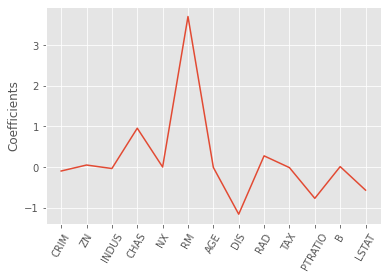

In [48]:
names = boston.drop('MEDV', axis=1).columns # column names
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,y).coef_ # extract coef atribute
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

# We can see at the plot that the most important for predicting
# the Boston house prices are rooms(RM)

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


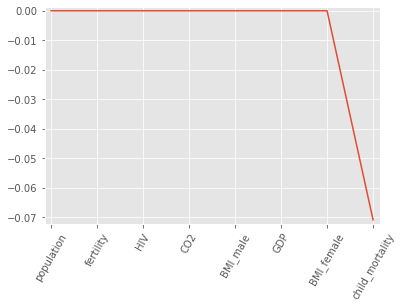

In [49]:
X = df.drop('life', axis=1).drop('Region', axis=1).values
y = df.life
lasso = Lasso(alpha=0.4, normalize=True) # we should use pipeline in preprocessing stage!!!

lasso.fit(X,y)
lasso_coef = lasso.coef_
print(lasso_coef)

df_columns = df.keys().drop('life').drop('Region')

plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

# According to the lasso algorithm, it seems like 'child_mortality' is the most important
# feature when predicting life expectancy

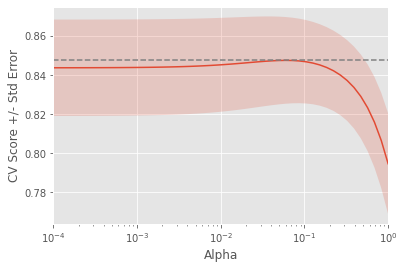

In [64]:
cv_num = 10

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(cv_num) 
    
    # alpha at the bottom just determining how transparent would be the plot, it's a shade
    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []
ridge = Ridge(normalize=True) # we should use pipeline in preprocessing stage!!!

for alpha in alpha_space:
    ridge.alpha = alpha
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=cv_num)
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))

display_plot(ridge_scores, ridge_scores_std)


# Fine-tuning model

Accuracy is not always good solution - `class imbalance` situation.
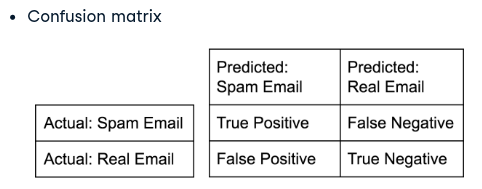

In confusion matrices usually the class of interests is called a positive class. In this particular example as we trying to detect spam, this makes spam positive class. <br> <br>
`Positive`: predicted our class of interests <br><br>
`True`: successful prediction <br> <br> <br>
`Accuracy`: $$ \frac{t_p + t_n}{t_p + t_n + f_p + f_n} $$ <br>
`Precision` (PPV - positive predictive value): $$ \frac{t_p}{t_p + f_p} $$ <br>
`Recall` (sensitivity / true positive rate etc.): $$ \frac{t_p}{t_p + f_n} $$ <br>
`Specificity`: $$ \frac{t_n}{t_n + f_p} $$ <br>
`F1 score` (harmonic mean of precision and recall): $$ 2 \times \frac{precision \times recall}{precision + recall} $$ <br>

- High precision: Not many real emails predicted as spam
- High recall: Predicted most spam emails correctly

$ \href{https://classeval.wordpress.com/introduction/basic-evaluation-measures/}{Cool source} $

In [69]:
diabetes = pd.read_csv('diabetes.csv')
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

knn = KNeighborsClassifier(n_neighbors=6)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



### Logistic regression and the ROC curve

Despite its name, it is used in classification problems not regression problems - it outputs probability `p` with respect to the target variable. If p > 0.5 we label the data as 1, otherwise we label it as 0. But it is only a `probability threshold` which we can manipulate. Similar was used in k-NN classifiers. <br> 

`ROC` (receiver operating characteristics) curve: the set of points we get when trying all posibible thresholds.

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[170  36]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       206
           1       0.65      0.65      0.65       102

    accuracy                           0.77       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.77      0.77      0.77       308



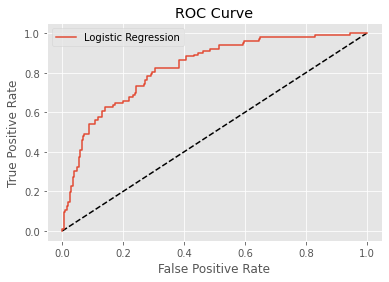

In [71]:
# return 2 columns, each one contains the probabilities for the
# respective target values, we chose second one - probabilites of
# the predicted labels being '1'
y_pred_prob = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
#print(thresholds)

-  tpr is Recall
- fpr is 1 - Specificity

### AUC - area under roc curve
The larger the AUC, the better our model is.

In [75]:
# Compute predicted probabilities: y_pred_prob (that the predicted target is 1)
y_pred_prob = logreg.predict_proba(X_test)[:,1]

print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))
print("Mean: {}".format(np.mean(cv_auc)))

AUC: 0.8260517799352751
AUC scores computed using 5-fold cross-validation: [0.80814815 0.80777778 0.82666667 0.87528302 0.83377358]
Mean: 0.8303298392732354


### Hyperparameter tuning

Parameters, that need to be specified before fitting the model e.g.: n_neighbors, alpha in ridge/lasso, parameters in linear regression. <br>

Try a bunch of different hyperparameter values, fit all of them seperately, see how well each performs and choose the best one.

#### Grid search

Performing k-fold cross-validation for each point in the grid and choose the best one.
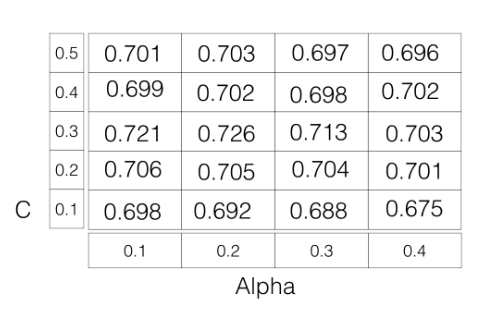

In [77]:
param_grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X,y)
knn_cv.best_params_, knn_cv.best_score_

({'n_neighbors': 14}, 0.7578558696205755)

In [57]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv and fit the data
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))
# weird output???

Tuned Logistic Regression Parameters: {'C': 19306.977288832535}
Best score is 0.7734997029114676


#### Randomizes Search CV and Decision tree

In [31]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X,y)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 7}
Best score is 0.7317714964773788


### Hold-out set

Dataset on which we will explore whether our model will be doing good on unseen data or not.

In [58]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)

print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 163789.3706954068, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7782608695652173


`Elastic net` - linear combination of `L1` and `L2`.

In [59]:
df = pd.read_csv('gapminder.csv')
X = (np.array(df.fertility)).reshape(-1,1)
y = (np.array(df.life)).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
l1_space = np.linspace(0,1,30)
param_grid = {'l1_ratio': l1_space} # l1_ratio = 1 - l2_ratio in elastic net
elastic_net = ElasticNet()
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)
gm_cv.fit(X_train,y_train)

y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.7862852801950472
Tuned ElasticNet MSE: 16.14127035124211


# Preprocessing and pipelines

### Preprocessing

Dealing with categorical variables - we need to convert them to be numerical, in order to do that we will be splitting feature into a number of binary features called dummy variables. <br>
- scikit-learn: `OneHotEncoder()`
- pandas: `get_dummies()`
    

In [34]:
df = pd.read_csv('auto.csv')
df_origin = pd.get_dummies(df)
# df_origin.head()
df_origin = df_origin.drop('origin_Asia',axis=1)
df_origin.head() # if origin_Europe = origin_US = 0 then origin_Asia = 1

,mpg,displ,hp,weight,accel,size,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,1
2,36.1,91.0,60,1800,16.4,10.0,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,1
4,34.3,97.0,78,2188,15.8,10.0,1,0


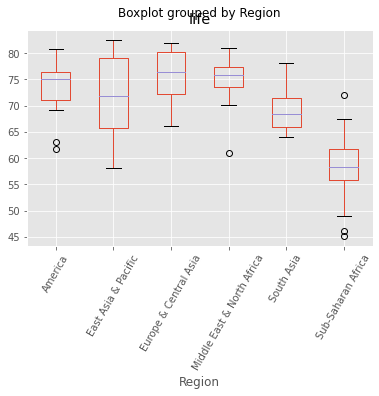

In [35]:
df = pd.read_csv('gapminder.csv')
df.boxplot('life', 'Region', rot=60)
plt.show()

In [36]:
df_region = pd.get_dummies(df)
print(*df_region.columns,'\n')
df_region = pd.get_dummies(df, drop_first=True) # america dropped
print(*df_region.columns)

population fertility HIV CO2 BMI_male GDP BMI_female life child_mortality Region_America Region_East Asia & Pacific Region_Europe & Central Asia Region_Middle East & North Africa Region_South Asia Region_Sub-Saharan Africa 

population fertility HIV CO2 BMI_male GDP BMI_female life child_mortality Region_East Asia & Pacific Region_Europe & Central Asia Region_Middle East & North Africa Region_South Asia Region_Sub-Saharan Africa


### Handling missing data

In [37]:
df = pd.read_csv('diabetes.csv')
# print(df.info())
# df.head() # triceps is 0?? missing data, therefore:

df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)
# print(df.info())

# df = df.dropna() # approx only half of row left, unacceptable - generally bad idea
# df.shape

A common strategy is, in any given column with missing values to compute mean of all non-missing entries and replece all missing values with that.

### Imputers / Transformers and Pipelines

By building a pipeline object we construct a list object of witch we want to do. Example below.


In [38]:
df = pd.read_csv('house-votes-84.csv')
df.columns = ['party', 'infants', 'water', 'budget', 'physician', 'salvador', 'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels', 'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
df[df == "n"] = 0
df[df == "y"] = 1
df[df == "?"] = np.nan

#print(df.isnull().sum())
print("Shape of Original DataFrame: {}".format(df.shape))
df = df.dropna()
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))
df.head()

Shape of Original DataFrame: (434, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
4,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
7,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
18,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
22,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
24,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


#### Another classifier: SVM - Support Vector Machine

In [39]:
# SVC stands for Support Vector Classification, which is a type of SVM
# Setup the Imputation transformer: imp
imp = SimpleImputer(missing_values='NaN', strategy='most_frequent')
steps = [('imputation', imp),
        ('SVM', SVC())]

X = df.drop('party', axis=1).values
y = df['party']

pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    democrat       0.97      0.97      0.97        36
  republican       0.97      0.97      0.97        34

    accuracy                           0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70



### Centering and scalling
Why scale your data? It may improve performance of our model. Features on larger scales can unduly infulence the model <br>
For example in kNN we want the features to be on the same scale therefore we need to normalize our data.
- Standarization: substract the mean, divide by variance
- Substract minimum and divide by the range f = (0,1)
- Can also normalize to f = (-1,1) 

We can put a scaling in a pipeline object.

In [40]:
X_scaled = scale(X)
print(np.mean(X), np.std(X))
print(np.mean(X_scaled), np.std(X_scaled))

0.5223599137931034 0.4994997840391597
-8.733435430779787e-18 1.0


In [41]:
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
knn_scaled = pipeline.fit(X_train, y_train)
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test))) 

# Should be a little better with scalling but I has bad dataset currently

Accuracy with Scaling: 0.9714285714285714
Accuracy without Scaling: 0.9714285714285714


In [42]:
# df = pd.read_csv('winequality-red.csv') # it is not read properly somehow xdd
steps = [('scaler', StandardScaler()),
        ('SVM', SVC())]
pipeline = Pipeline(steps)
# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
             'SVM__gamma':[0.1, 0.01]}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
cv = GridSearchCV(pipeline, parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
print("Accuracy:", cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))
print("Tuned model params:", cv.best_params_)

Accuracy: 0.9787234042553191
              precision    recall  f1-score   support

    democrat       1.00      0.96      0.98        23
  republican       0.96      1.00      0.98        24

    accuracy                           0.98        47
   macro avg       0.98      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47

Tuned model params: {'SVM__C': 10, 'SVM__gamma': 0.01}


In [60]:
df = pd.read_csv('gapminder.csv')
y = np.array(df['life'])
X = np.array(df.drop('life', axis=1).drop('Region', axis=1).values)

# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='mean')),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016570888216
